In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000865911"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000865911
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,CASCADE BANCORP
Ticker,CACB


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,38.0,6.213947e+00,2.408599e+00,3.36,4.492500e+00,4.87,9.127500e+00,11.15
interest income,38.0,2.467311e+07,1.060089e+07,10134000.00,1.721375e+07,20916000.00,3.339825e+07,43956000.00
net income,38.0,2.787684e+06,1.198767e+07,-54420000.00,1.957750e+06,4809500.00,6.012000e+06,31044000.00
net interest income,38.0,1.951924e+07,5.798188e+06,9129000.00,1.441700e+07,19538000.00,2.471100e+07,28074000.00
provision for loan losses,7.0,4.541700e+05,6.336738e+05,54590.00,7.030000e+04,113000.00,6.855000e+05,1500000.00
total revenue,38.0,2.439668e+07,6.937371e+06,12416000.00,1.741875e+07,25561000.00,3.143350e+07,33771000.00


# Plots

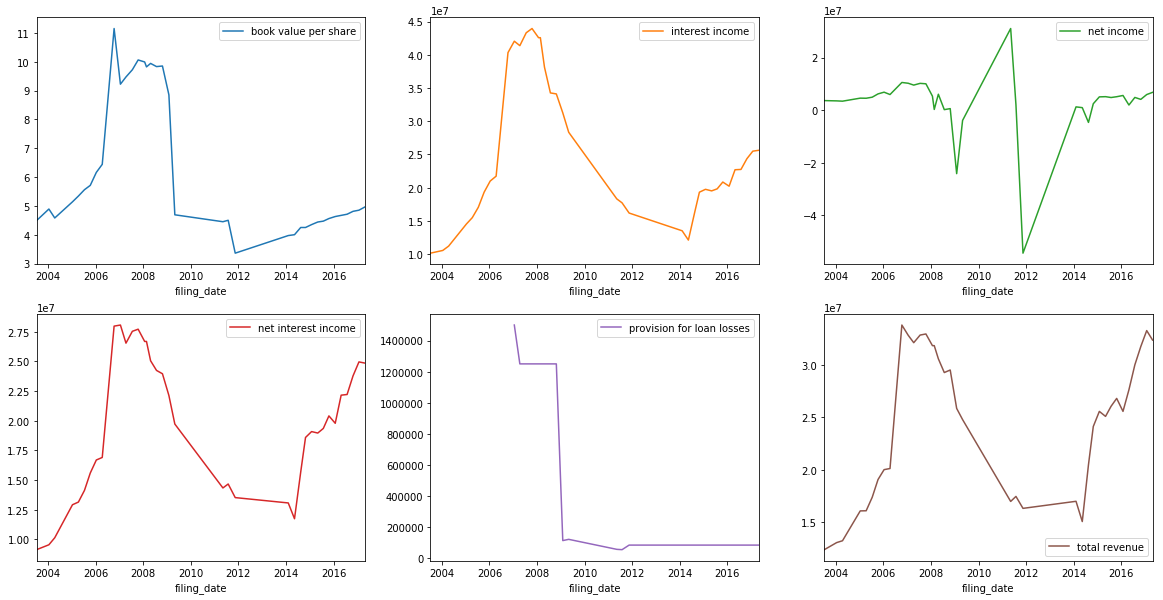

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000865911 book value per share                             2003Q3    missing   
           book value per share        2004Q2 to 2004Q3: 2 periods    missing   
           book value per share                             2006Q2    missing   
           book value per share        2009Q2 to 2010Q4: 7 periods    missing   
           book value per share        2011Q4 to 2013Q3: 8 periods    missing   
           interest income                                  2003Q3    missing   
           interest income             2004Q2 to 2004Q3: 2 periods    missing   
           interest income                                  2006Q2    missing   
           interest income             2009Q2 to 2010Q4: 7 periods    missing   
           interest income             2011Q4 to 2013Q3: 8 periods    missing   
           net income                                       2003Q3    missing   
           net income                  2004Q2 to 2004Q3: 2 periods    missing   
           net income                                       2006Q2    missing   
           net income                                       2007Q4  duplicate   
           net income                  2009Q2 to 2010Q4: 7 periods    missing   
           net income                  2011Q4 to 2013Q3: 8 periods    missing   
           net interest income                              2003Q3    missing   
           net interest income         2004Q2 to 2004Q3: 2 periods    missing   
           net interest income                              2006Q2    missing   
           net interest income         2009Q2 to 2010Q4: 7 periods    missing   
           net interest income         2011Q4 to 2013Q3: 8 periods    missing   
           provision for loan losses  2003Q2 to 2006Q3: 14 periods    missing   
           provision for loan losses   2007Q2 to 2008Q3: 6 periods    missing   
           provision for loan losses   2009Q2 to 2010Q4: 7 periods    missing   
           provision for loan losses  2011Q4 to 2017Q1: 22 periods    missing   
           total revenue                                    2003Q3    missing   
           total revenue               2004Q2 to 2004Q3: 2 periods    missing   
           total revenue                                    2006Q2    missing   
           total revenue               2009Q2 to 2010Q4: 7 periods    missing   
           total revenue               2011Q4 to 2013Q3: 8 periods    missing   

                                               message  
cik        item                                         
0000865911 book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           interest income              Missing period  
           interest income              Missing period  
           interest income              Missing period  
           interest income              Missing period  
           interest income              Missing period  
           net income                   Missing period  
           net income                   Missing period  
           net income                   Missing period  
           net income                 Duplicate period  
           net income                   Missing period  
           net income                   Missing period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income          Missing period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           provision for loan losses    Mi

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()